In this exercise, we will use principal component analysis (PCA) to perform dimensionality  reduction.   You  will  first  experiment  with  an  example  2D dataset  to  get  intuition  on  how  PCA  works,  and  then  use  it  on  a  bigger dataset of 5000 face image dataset

To help us understand how PCA works, we will first start with a 2D datasetwhich has one direction of large variation and one of smaller variation.

In this part of theexercise, we will visualize what happens when we use PCA to reduce the data from 2D to 1D. In practice, we might want to reduce data from 256 to50 dimensions, say; but using lower dimensional data in this example allows us to visualize the algorithms better.

In [14]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.linalg import svd

In [2]:
data=loadmat('data/ex7data1.mat')

In [3]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 14 22:41:44 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[3.38156267, 3.38911268],
        [4.52787538, 5.8541781 ],
        [2.65568187, 4.41199472],
        [2.76523467, 3.71541365],
        [2.84656011, 4.17550645],
        [3.89067196, 6.48838087],
        [3.47580524, 3.63284876],
        [5.91129845, 6.68076853],
        [3.92889397, 5.09844661],
        [4.56183537, 5.62329929],
        [4.57407171, 5.39765069],
        [4.37173356, 5.46116549],
        [4.19169388, 4.95469359],
        [5.24408518, 4.66148767],
        [2.8358402 , 3.76801716],
        [5.63526969, 6.31211438],
        [4.68632968, 5.6652411 ],
        [2.85051337, 4.62645627],
        [5.1101573 , 7.36319662],
        [5.18256377, 4.64650909],
        [5.70732809, 6.68103995],
        [3.57968458, 4.80278074],
        [5.63937773, 6.12043594],
        [4.26346851, 4.68942896],
        [2.53651693, 3.88449078],
      

In [4]:
X=data['X']

In [5]:
X.shape

(50, 2)

# Visualize The Data 

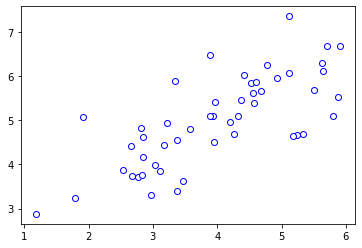

In [13]:
plt.plot(X[:,0],X[:,1],'o',markeredgecolor='b',markerfacecolor='w');

# Implementing PCA

In this part of the exercise, we will implement PCA. PCA consists of two computational steps:  First, we compute the covariance matrix of the data.

Then,  we  use SVD function  to  compute  the  eigenvectors U1,U2,...,Un.   These  will  correspond  to  the  principal  components  of variation in the data.  

Before using PCA, it is important to first normalize the data by subtracting the mean value of each feature from the dataset, and scaling each dimension so that they are in the same range.

In [15]:
def feature_norm(X):
    mu=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    X1=(X-mu)/std
    return X1

In [22]:
def compute_covar_matrix(X):
    m=len(X)
    return (1/m)*np.dot(X.T,X)

In [23]:
X_norm=feature_norm(X)

In [27]:
sigma=compute_covar_matrix(X_norm)

In [28]:
sigma.shape

(2, 2)

After computing the covariance matrix, we can run SVD on it to compute the principal component

In [29]:
U,S,V=svd(sigma)

In [30]:
U

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

After computing the principal components, we can use them to reduce thefeature dimension of your dataset by projecting each example onto a lower dimensional space

# Projecting the data onto the principal components

In [40]:
Ureduce=U[:,0:1]

In [47]:
z=np.dot(X_norm,Ureduce)

In [48]:
z.shape

(50, 1)

In [49]:
z

array([[ 1.49631261],
       [-0.92218067],
       [ 1.22439232],
       [ 1.64386173],
       [ 1.2732206 ],
       [-0.97681976],
       [ 1.26881187],
       [-2.34148278],
       [-0.02999141],
       [-0.78171789],
       [-0.6316777 ],
       [-0.55280135],
       [-0.0896816 ],
       [-0.5258541 ],
       [ 1.56415455],
       [-1.91610366],
       [-0.88679735],
       [ 0.95607375],
       [-2.32995679],
       [-0.47793862],
       [-2.21747195],
       [ 0.38900633],
       [-1.78482346],
       [ 0.05175486],
       [ 1.66512392],
       [ 0.50813572],
       [-1.23711018],
       [-1.17198677],
       [ 0.84221686],
       [-0.00693174],
       [-0.22794195],
       [-1.51309518],
       [ 1.33874082],
       [-0.5925244 ],
       [ 0.67907605],
       [-1.35298   ],
       [ 1.68749495],
       [-1.39235931],
       [ 2.55992598],
       [-0.27850702],
       [-0.97677692],
       [ 0.88820006],
       [ 1.29666127],
       [-0.98966774],
       [ 1.81272352],
       [-0

# Reconstructing an approximation of the data

After  projecting  the  data  onto  the  lower  dimensional  space,  we  can  approximately recover the data by projecting them back onto the original high dimensional space.

In [50]:
X_recov=np.dot(z,Ureduce.T)

In [51]:
X_recov.shape

(50, 2)

In [52]:
X_recov

array([[-1.05805279, -1.05805279],
       [ 0.65208021,  0.65208021],
       [-0.86577611, -0.86577611],
       [-1.16238578, -1.16238578],
       [-0.90030292, -0.90030292],
       [ 0.69071588,  0.69071588],
       [-0.89718548, -0.89718548],
       [ 1.65567835,  1.65567835],
       [ 0.02120713,  0.02120713],
       [ 0.55275802,  0.55275802],
       [ 0.44666359,  0.44666359],
       [ 0.39088959,  0.39088959],
       [ 0.06341447,  0.06341447],
       [ 0.371835  ,  0.371835  ],
       [-1.10602429, -1.10602429],
       [ 1.35488989,  1.35488989],
       [ 0.62706042,  0.62706042],
       [-0.67604623, -0.67604623],
       [ 1.64752825,  1.64752825],
       [ 0.33795364,  0.33795364],
       [ 1.56798945,  1.56798945],
       [-0.27506901, -0.27506901],
       [ 1.26206077,  1.26206077],
       [-0.03659622, -0.03659622],
       [-1.17742041, -1.17742041],
       [-0.35930621, -0.35930621],
       [ 0.874769  ,  0.874769  ],
       [ 0.82871979,  0.82871979],
       [-0.59553725,

# Visualizing the projections

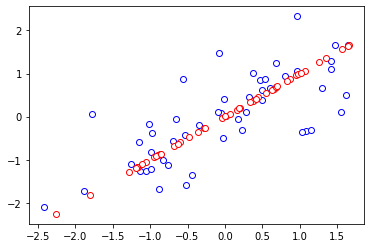

In [56]:
plt.plot(X_norm[:,0],X_norm[:,1],'o',markeredgecolor='b',markerfacecolor='w')
plt.plot(X_recov[:,0],X_recov[:,1],'o',markeredgecolor='r',markerfacecolor='w');

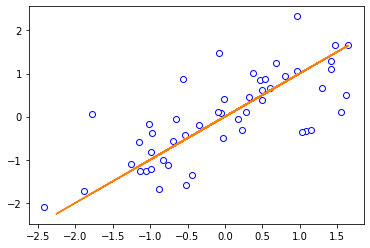

In [57]:
plt.plot(X_norm[:,0],X_norm[:,1],'o',markeredgecolor='b',markerfacecolor='w')
plt.plot(X_recov[:,0],X_recov[:,1],'-',markeredgecolor='r',markerfacecolor='w');

# Face Image Dataset

In this part of the exercise, we will run PCA on face images to see how it can be used in practice for dimension reduction.

The dataset ex7faces.mat contains a dataset X of face images,  each 32×32 in grayscale
Each row of X corresponds to one face image (a row vector of length 1024).

In [61]:
data1=loadmat('data/ex7faces.mat')

In [62]:
data1

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 14 23:46:35 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[ -37.86631387,  -45.86631387,  -53.86631387, ..., -110.86631387,
         -111.86631387,  -99.86631387],
        [   8.13368613,   -0.86631387,   -8.86631387, ...,  -34.86631387,
           -8.86631387,    0.13368613],
        [ -32.86631387,  -34.86631387,  -36.86631387, ..., -110.86631387,
         -111.86631387, -111.86631387],
        ...,
        [ -46.86631387,  -24.86631387,   -8.86631387, ...,   90.13368613,
           80.13368613,   59.13368613],
        [  19.13368613,   16.13368613,   14.13368613, ...,  -38.86631387,
          -41.86631387,  -46.86631387],
        [-108.86631387, -106.86631387, -102.86631387, ...,   17.13368613,
           17.13368613,   18.13368613]])}

In [63]:
face_data=data1['X']

In [64]:
face_data.shape

(5000, 1024)

# Visualize Data

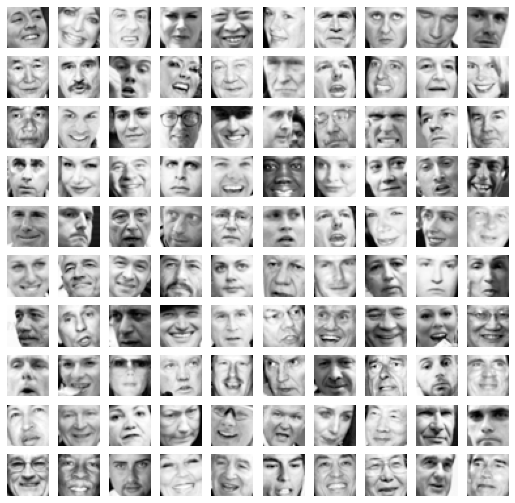

In [74]:
plt.figure(figsize=(9,9))
for i in range(100):
    
    
    plt.subplot(10,10,i+1)
    plt.imshow(face_data[np.random.choice([i for i in range(5000)]),:].reshape((32,32)).T,cmap="Greys_r")
    plt.axis('off');

Dimensionality Reduction Now that you have computed the principal components for the face dataset,you can use it to reduce the dimension of the face dataset.  This allows you touse your learning algorithm with a smaller input size (e.g., 100 dimensions)instead of the original 1024 dimensions.  This can help speed up your learningalgorithm.

In [122]:
face_data_norm=face_data-np.mean(face_data,axis=0)

In [123]:
m=len(face_data_norm)

sigma=(1/m)*np.dot(face_data_norm.T,face_data_norm)


In [124]:
U,S,V=svd(sigma)

In [125]:
Ureduce=U[:,0:100]

In [126]:
z=np.dot(face_data_norm,Ureduce)

In [127]:
z.shape

(5000, 100)

To understand what is lost in the dimension reduction, you can recover the data using only the projected dataset. This can be done using the inverse_transform method of PCA class. Now display the images using recovered data. From the reconstruction, you can ob-serve that the general structure and appearance of the face are kept while the fine details are lost

In [130]:
face_data_recov=np.dot(z,Ureduce.T)

# Visualize The Recovered Data

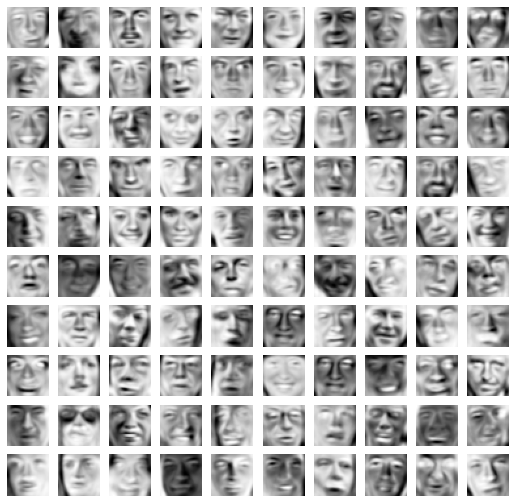

In [131]:
plt.figure(figsize=(9,9))
for i in range(100):
    
    
    plt.subplot(10,10,i+1)
    plt.imshow(face_data_recov[np.random.choice([i for i in range(5000)]),:].reshape((32,32)).T,cmap="Greys_r")
    plt.axis('off');

We can experiment further by increasing or decreasing the number of principal components to be used for the projected dataset and then plotting the images using recovered data from the projected dataset. We will see that as the number of components increases, finer details of the images are captured.

# Thank You